# Material Balances XVI

This lecture continues with a discussion of yield, selectivity, and optimization. We also discuss instantaneous selectivity and how we can use it to inform reactor selection and ideal operating conditions. Today, we will take a closer look at differences in yield and selectivity observed in different types of flow reactors, and we will discuss reasons why selectivity might depend on our choice of reactor.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.integrate import solve_ivp
from scipy.interpolate import interp1d

## Example Problem 01

```{note}
This is Example 4.5 from *Chemical Reactor Analysis and Design Fundamentals, 2nd ed.* by Rawlings and Ekerdt. This problem was already solved in [Notebook 29](https://jqbond.github.io/CEN587/Notebooks/587-N29.html), and we defined overall yields and selectivities in [Notebook 30](https://jqbond.github.io/CEN587/Notebooks/587-N30.html) We will present a brief review of the solution and then expand our analysis to include a discussion of instantaneous selectivity and how reactor choice might be an important consideration in optimizing product yields. 
```

You are carrying out Benzene Pyrolysis in a Plug Flow Reactor operating at 1033K and 1.0 atm.  The two reactions occurring in this system are benzene coupling to form diphenyl and hydrogen followed by a secondary reaction between benzene and diphenyl to form triphenyl and hydrogen:

\begin{align*}
&2B \longleftrightarrow D + H_2\\
&B + D \longleftrightarrow T + H_2
\end{align*}

Both reactions are reversible and ***follow elementary rate laws***.  Rate constants and equilibrium concentration ratios ($K_C$) are given below.

\begin{align*}
&k_1 = 7.0 \ \times 10^5 \ \textrm{L} \ \textrm{mol}^{-1} \ \textrm{h}^{-1}\\
&k_2 = 4.0 \ \times 10^5 \ \textrm{L} \ \textrm{mol}^{-1} \ \textrm{h}^{-1}\\
&K_{C_1} = 0.31\\
&K_{C_2} = 0.48
\end{align*}

If pure benzene is fed into the reactor at 60,000 moles per hour, find the PFR volume required to maximize the yield to diphenyl.

### Solution to Example Problem 01

Even though there are multiple reactions, we approach this problem the same way as usual: we write a material balance on Benzene.

$$\frac{dF_B}{dV} = R_B$$

We generally know that $R_B$ is going to be a complex function of concentrations of all of the species present in this system.  That means we can't solve the above balance on Benzene without also solving balances on Diphenyl, Hydrogen, and Triphenyl *at the same time*, i.e., we have to solve the coupled system of differential equations below:

\begin{align*}
    \frac{dF_B}{dV} &= R_B \\
    \frac{dF_D}{dV} &= R_D \\
    \frac{dF_H}{dV} &= R_H \\
    \frac{dF_T}{dV} &= R_T \\
\end{align*}

So, we've got 4 differential equations that tell us how 4 dependent variables ($F_B$, $F_D$, $F_H$, $F_T$) change as a function of the one independent variable, $V$.  We can solve this system *if* we can define everything on the right hand sides of the above equations ($R_B$, $R_D$, $R_H$, and $R_T$) in terms of $F_B$, $F_D$, $F_H$, $F_T$, and/or $V$.

We know how to do this!!

Generally:

$$R_j = \sum_i \nu_{i,j} r_i$$

So:

\begin{align*}
    R_B &= -2r_1 - r_2 \\
    R_D &=  r_1 - r_2 \\
    R_H &=  r_2 + r_2 \\
    R_T &=  r_2 \\
\end{align*}

We next define reaction rates:

\begin{align*}
    r_1 &= k_{1,f}C_B^2 - k_{1,r}C_HC_D \\
    r_2 &= k_{2,f}C_BC_D - k_{2,r}C_HC_T \\
\end{align*}

We define concentrations in terms of molar flowrates:

$$C_j = \frac{F_j}{Q}$$

This introduces the volumetric flowrate, $Q$, into the system.  Fortunately, this is a gas phase reaction at low pressure, so we know we can define $Q$ in terms of the total molar flowrate:

$$Q = \frac{F_{tot}RT}{P}$$

Where total molar flowrate is defined in terms of individual species flowrates, i.e., our state variables.

$$F_{tot} = \sum_j F_j$$

**Yield of Diphenyl with respect to Benzene**

According to the first reaction, each diphenyl produced will consume two benzenes, so the correct definition for yield according to the equations in the preceding section is:

$$Y_{D/B} = \frac{2F_D}{F_{Bf}}$$

**Yield of Triphenyl with respect to Benzene**

The coefficients are less clear for triphenyl since each triphenyl consumes one diphenyl...which consumes two benzenes.  The easiest way to handle the yield definition for a sequential reaction like this is to add the overall reactions so that we can relate triphenyl directly to benzene:

\begin{align*}
   &2B \leftrightarrow D + H \\
   &B + D \leftrightarrow T + H \\
        \hline
    &3B \leftrightarrow T + 2H \\
\end{align*}

From that overall equation, it becomes clear that it takes 3 benzenes to make one triphenyl, so the yield definition is:

$$Y_{T/B} = \frac{3F_T}{F_{Bf}}$$

We extend these ideas to the selectivity definitions, which quantify the percentage of consumed reactant that went to produce diphenyl or triphenyl.

**Selectivity to diphenyl with respect to benzene:**

$$S_{D/B} = \frac{2F_D}{F_{Bf} - F_B}$$

**Selectivity to triphenyl with respect to benzene:**

$$S_{T/B} = \frac{3F_T}{F_{Bf} - F_B}$$

With that, we've defined out system of ODES fully as a function of molar flowrates and reactor volume.  We can solve this numerically using solve_ivp.  See below

C:\Users\jqbon\AppData\Local\Temp\ipykernel_10696\4035293566.py:93: RuntimeWarning: invalid value encountered in divide
  SDB     = FDout*2/(FBf - FBout)
C:\Users\jqbon\AppData\Local\Temp\ipykernel_10696\4035293566.py:94: RuntimeWarning: invalid value encountered in divide
  STB     = FTout*3/(FBf - FBout)


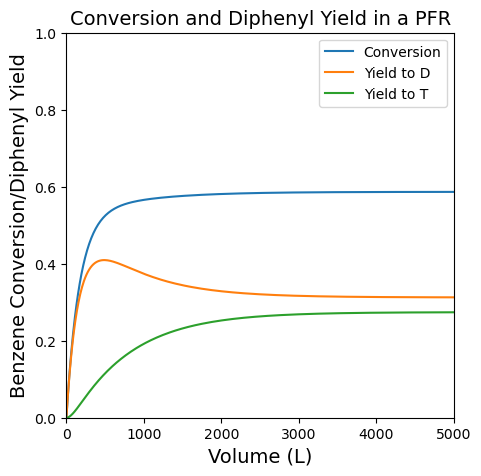

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.40944519130527224
       x: 487.88217559536014
     nit: 10
    nfev: 17
The maximum yield is 0.409 at a PFR volume of 488L


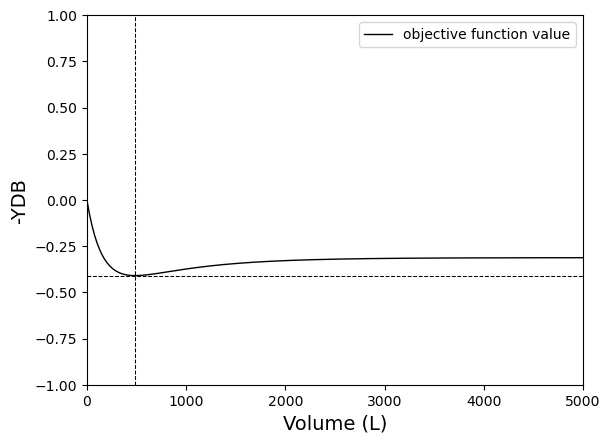

In [2]:
#############################################################
# Constants from problem statement; define as globals       #
#############################################################

T   = 1033    #K
P   = 1.0     #atm
R   = 0.08206 #L*atm/mol/K
k1f = 7.0e5   #L/mol/h
k2f = 4.0e5   #L/mol/h
KC1 = 0.31
KC2 = 0.48
k1r = k1f/KC1 #L/mol/h
k2r = k2f/KC2 #L/mol/h
FBf = 60000   #mol/h
FDf = 0
FHf = 0
FTf = 0

##############################################################
# Define ODE system in a function                            #
# Function has typical form f(V, [FB, FD, FH, FT])           #
# It returns [dFB/dV, dFD/dV, dFH/dV, dFT/dV]                #
##############################################################

def P01(vol, var):
    
    #unpack state-dependent variables in var
    FB, FD, FH, FT = var
    
    # The above is functionally equivalent to
    # FB = var[0]
    # FD = var[1]
    # FH = var[2]
    # FT = var[3]
      
    #total molar flowrate, function of individual molar flowrates
    FTOT = FB + FD + FH + FT
    
    #volumetric flowrate
    Q    = FTOT*R*T/P
    
    #Define concentrations
    CB   = FB/Q
    CD   = FD/Q
    CH   = FH/Q
    CT   = FT/Q
    
    #now that we have concentrations, we define reaction rates
    r1   = k1f*CB**2 - k1r*CD*CH
    r2   = k2f*CB*CD - k2r*CT*CH
    
    #With reaction rates, you can define production rates
    RB   = -2*r1 - r2
    RD   =    r1 - r2
    RH   =    r1 + r2
    RT   =         r2
    
    #For a PFR, dFj/dV = Rj, so these are our derivatives of FB, FD, FH, FT
    D1   = RB
    D2   = RD
    D3   = RH
    D4   = RT
    
    #return derivatives of each dependent variable w.r.t. volume
    return [D1, D2, D3, D4]

############################################################################
# Set starting state and integration span for solve_ivp()                  #
############################################################################
vspan   = (0, 5000)
var0    = [FBf, FDf, FHf, FTf]

############################################################################
# Solve using solve_ivp()                                                  #
############################################################################
solP01 = solve_ivp(P01, vspan, var0, atol = 1e-10, rtol = 1e-10)

############################################################################
# Extract necessary data from the solution structure.                      #
############################################################################
Vout    = solP01.t
FBout   = solP01.y[0]
FDout   = solP01.y[1]
FHout   = solP01.y[2]
FTout   = solP01.y[3]

############################################################################
# Calculate conversion, selectivities, and yields                          #
############################################################################
XBout   = (FBf - FBout)/FBf
YDB     = FDout*2/FBf
YTB     = FTout*3/FBf
SDB     = FDout*2/(FBf - FBout)
STB     = FTout*3/(FBf - FBout)

############################################################################
# Plot yield and conversion vs. reactor volume                             # 
############################################################################
plt.figure(figsize = (5, 5))
plt.title('Conversion and Diphenyl Yield in a PFR', fontsize = 14)
plt.plot(Vout, XBout, label = 'Conversion')
plt.plot(Vout, YDB, label = 'Yield to D')
plt.plot(Vout, YTB, label = 'Yield to T')
plt.xlim(0, max(vspan))
plt.ylim(0, 1)
plt.xlabel('Volume (L)', fontsize = 14)
plt.ylabel('Benzene Conversion/Diphenyl Yield', fontsize = 14)
plt.legend()
plt.show()

############################################################################
# Create a continuous interpolating polynomial approximation for YDB(V)    #
############################################################################
YvVolP = interp1d(Vout, YDB, kind = 'cubic')

############################################################
# Define objective function to minimize                    #
############################################################

obj = lambda V: -1*YvVolP(V)

############################################################
# Find the value of V that minimizes obj(V)                #
############################################################

opt_ans = opt.minimize_scalar(obj)

############################################################
# Display answers                                          #
############################################################

print(opt_ans)
print(f'The maximum yield is {-1*opt_ans.fun:3.3f} at a PFR volume of {opt_ans.x:3.0f}L')


############################################################
# Graph the objective function vs. volume; confirm minimum #
############################################################
vset = np.linspace(0, 5000, 200)
plt.plot(vset, obj(vset), color = 'black', linewidth = 1, linestyle = 'solid', label = 'objective function value')
plt.hlines(opt_ans.fun, 0, max(vspan), linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.vlines(opt_ans.x, -1, 1, linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.xlim(0, 5000)
plt.ylim(-1, 1)
plt.xlabel('Volume (L)', fontsize = 14)
plt.ylabel('-YDB', fontsize = 14)
plt.legend()
plt.show()




## Example Problem 02

```{note}
This is Example 4.5 from *Chemical Reactor Analysis and Design Fundamentals, 2nd ed.* by Rawlings and Ekerdt adapted for a CSTR. This problem was already solved in [Notebook 29](https://jqbond.github.io/CEN587/Notebooks/587-N29.html). We will present a brief review of the solution, add definitions of overall yield and selectivity, and then highlight differences between this CSTR case and that of the PFR considered in [Example Problem 01](#example-problem-01).
```

You are carrying out Benzene Pyrolysis in a CSTR operating at 1033K and 1.0 atm.  The two reactions occurring in this system are benzene coupling to form diphenyl and hydrogen followed by a secondary reaction between benzene and diphenyl to form triphenyl and hydrogen:

\begin{align*}
&2B \longleftrightarrow D + H_2\\
&B + D \longleftrightarrow T + H_2
\end{align*}

Both reactions are reversible and follow elementary rate laws.  Rate constants and equilibrium concentration ratios ($K_C$) are given below.

\begin{align*}
&k_1 = 7.0 \ \times 10^5 \ \textrm{L} \ \textrm{mol}^{-1} \ \textrm{h}^{-1}\\
&k_2 = 4.0 \ \times 10^5 \ \textrm{L} \ \textrm{mol}^{-1} \ \textrm{h}^{-1}\\
&K_{C_1} = 0.31\\
&K_{C_2} = 0.48
\end{align*}

If pure benzene is fed into the reactor at 60,000 moles per hour, find the CSTR volume required to maximize diphenyl yield.

### Solution to Example Problem 02

If we consider a material balance on Benzene in a CSTR at steady state:

$$0 = F_{B,f} - F_B + R_BV$$

We notice the production rate of $B$, $R_B$ in this expression, and we might already anticipate that it is going to be a complicated function of the concentrations of all species present in this system. We know this is going to happen because species $B$ is participating in two different reactions, each with a different rate expression that depends on concentrations of various species. Once we consider the two rate laws in detail, we conclude that $R_B$ will depend on the concentrations of diphenyl, triphenyl, and hydrogen. This means that there are many "unknowns" hidden in the definition of $R_B$, and we cannot solve this single equation in isolation. We need to somehow define the concentrations of all species...

The easiest way to do this is to recognize that we can write a single, independent balance for each component:

\begin{align}
    0 &= F_{B,f} - F_B + R_BV \\
    0 &= F_{D,f} - F_D + R_DV \\
    0 &= F_{H,f} - F_H + R_HV \\
    0 &= F_{T,f} - F_T + R_TV \\
\end{align}

One way to think about this is as a system of four equations written in terms of five unknowns ($F_B$, $F_D$, $F_H$, $F_T$, and $V$).  We can say this because although we don't "know" the production rates for each species, $R_j$, we ***can*** express all of them as functions of species flow rates. In [Notebook 29](), our goal was to solve for the CSTR volume required to achieve 50% conversion of benzene. Here, we have a slightly different goal, which is to find the CSTR volume that optimizes diphenyl yield. We don't know what that optimium yield is at the outset of the problem, so we will use the following conceptual approach -- we will guess a volume, and we will solve for the resultant diphenyl yield at that volume. In this way, we can eventually find the volume that optimizes diphenyl yield. The key thing to recognize is that once we specify volume, we have reduced the problem to four unknowns ($F_B$, $F_D$, $F_H$, $F_T$), and the above system of equations can be solved using a nonlinear algebraic equation solver. 

To he only remaining task is to ensure that we've defined the right hand side of each equation in terms of constants and species flowrates (our four unknowns). If we can accomplish that, then the problem can be solved with `opt.root()`. We start with the definition for production rate:

$$R_j = \sum_i \nu_{i,j} r_i$$

Applying this to each species:

\begin{align*}
    R_B &= -2r_1 - r_2 \\
    R_D &=  r_1 - r_2 \\
    R_H &=  r_2 + r_2 \\
    R_T &=  r_2 \\
\end{align*}

We next define reaction rates:

\begin{align*}
    r_1 &= k_{1,f}C_B^2 - k_{1,r}C_HC_D \\
    r_2 &= k_{2,f}C_BC_D - k_{2,r}C_HC_T \\
\end{align*}

We define concentrations in terms of molar flowrates:

$$C_j = \frac{F_j}{Q}$$

This introduces the unknown volumetric flowrate, $Q$. Fortunately, this is a gas phase reaction at low pressure, so we know we can define $Q$ in terms of the total molar flowrate:

$$Q = \frac{F_{tot}RT}{P}$$

Where the total molar flowrate is given by the sum of all component molar flowrates.

$$F_{tot} = \sum_j F_j$$

**Yield of Diphenyl with respect to Benzene**

According to the first reaction, each diphenyl produced will consume two benzenes, so the correct definition for yield according to the equations in the preceding section is:

$$Y_{D/B} = \frac{2F_D}{F_{Bf}}$$

**Yield of Triphenyl with respect to Benzene**

We add the overall reactions so that we can relate triphenyl directly to benzene:

\begin{align*}
   &2B \leftrightarrow D + H \\
   &B + D \leftrightarrow T + H \\
        \hline
    &3B \leftrightarrow T + 2H \\
\end{align*}

From this, it is clear that it takes 3 benzenes to make one triphenyl, so the correct definition of triphenyl yield is:

$$Y_{T/B} = \frac{3F_T}{F_{Bf}}$$

We extend these ideas to the selectivity definitions, which quantify the percentage of consumed reactant that went to produce diphenyl or triphenyl.

**Selectivity to diphenyl with respect to benzene:**

$$S_{D/B} = \frac{2F_D}{F_{Bf} - F_B}$$

**Selectivity to triphenyl with respect to benzene:**

$$S_{T/B} = \frac{3F_T}{F_{Bf} - F_B}$$

We set this up below as a system of five equations written in terms of five unknowns. Then we solve it using `opt.root()`

```{note}
In the cell below, we will show a couple of strategies for optimization. The first is actually similar to what we did in the PFR solution. We will obtain a large array of dipheynyl yields at many different CSTR volumes; then we will create a continuous interpolating polynomial function to approximate YDB(V) and optimize that using `opt.minimize_scalar()`. This approach is nice because it also allows us to generate a graph of YDB(V) results for direct comparison with behavior as a function of Volume in a PFR. 

One might consider an alternate approach, which is to create an objective function that directly returns YDB(V) upon solution of the system of algebraic equations using `opt.root()`. This is a less straighforward approach because it involves wrapping an oprimization routine around a nonlinear equation solver, which is not something we usually think to do when we are first learning these methods. That said, this approach is useful and extensible, so we provide the alternate solution here. Neither is necessarily better or worse. Both will give a correct answer, but one might be more efficient or easier to use in certain instances, so it is worth being familiar with both methods.
```

C:\Users\jqbon\AppData\Local\Temp\ipykernel_10696\2377870078.py:81: RuntimeWarning: invalid value encountered in divide
  DB     = FDout*2/(FBf - FBout)
C:\Users\jqbon\AppData\Local\Temp\ipykernel_10696\2377870078.py:82: RuntimeWarning: invalid value encountered in divide
  STB     = FTout*3/(FBf - FBout)


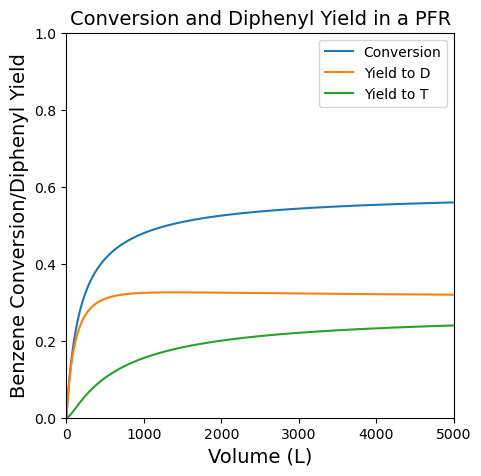

 message: Solution found.
 success: True
  status: 0
     fun: -0.32567292226582656
       x: 1404.1121230635288
     nit: 16
    nfev: 16
The maximum yield is 0.326 at a CSTR volume of 1404L


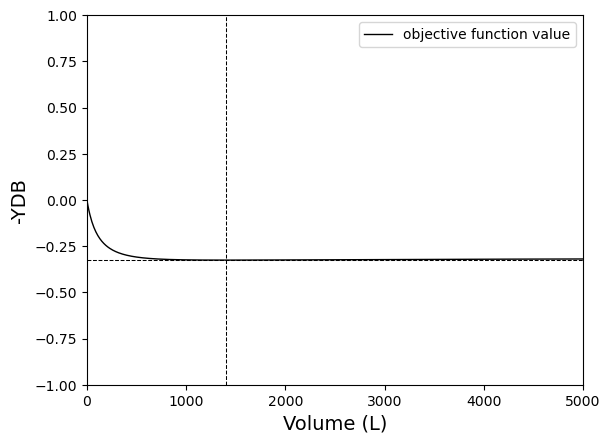

In [3]:
###############################################################################################
# Define the system of equations in form compatible with opt.root()                           #
# Function has the form f([FB, FD, FH, FT], V)                                                #
# We are passing volume as an extra parameter to facilitate optimization                      #
# By specifying volume, we have reduced the problem to 4 unknowns (FB, FD, FH, FT)            #
###############################################################################################

def P02(var, V):
    #unknowns in the array var
    FB, FD, FH, FT = var
                   
    #Total molar flowrate
    FTOT = FB + FD + FH + FT
    
    #Volumetric flowrate
    Q    = FTOT*R*T/P
    
    #Define species concentrations
    CB   = FB/Q
    CD   = FD/Q
    CH   = FH/Q
    CT   = FT/Q
    
    #Define reaction rates
    r1   = k1f*CB**2 - k1r*CD*CH
    r2   = k2f*CB*CD - k2r*CT*CH
    
    #Define species production rates
    RB   = -2*r1 - r2
    RD   =    r1 - r2
    RH   =    r1 + r2
    RT   =         r2
       
    #Write the five equations to be solved.
    F1   = FBf - FB + RB*V
    F2   = FDf - FD + RD*V
    F3   = FHf - FH + RH*V
    F4   = FTf - FT + RT*V

    #Return the left hand side of each of the four constraint equations
    #When the problem is solved, these should all be zero.
    return [F1, F2, F3, F4]

##########################################################################################################
# Create a list of volumes we're interested in solving; our choice, let's go from 0.01 to 5000L          #
# Do this in 500 elements. We're going solve the above system for 500 different volumes                  #
# We will create a loop that will solve for each volume in V using opt.root() on each pass               #
# Each volume is passed to the system of equations as an extra parameter using the args keyword          #
##########################################################################################################

V = np.linspace(0.01, 5000, 500) # Set of volumes we will solve system at.
F = np.zeros((len(V), 4))        # Pre-allocate an array to store solutions [FB, FD, FH, FT] at each Volume; shape will be (500, 4)

##########################################################################################################
# Use a for loop to solve a new instance of the system of equations for each volume in V                 #
# Store the result on each pass in F[i, :]                                                               #
##########################################################################################################

for i, vol in enumerate(V): 
    var0    = (FBf/2, FBf/2, FBf/2, FBf/2)
    solP02 = opt.root(P02, var0, args = (vol,)) # Let's handle passing the extra volume parameter with the args keyword!
    if solP02.success == False:
        print("Warning: opt.root() failed to converge!") # It is useful to add a warning that will trigger if there is a problem!
    F[i,:]  = solP02.x


##########################################################################################################
# The loop is complete, now extract molar flowrates at each volume in V                                  #
##########################################################################################################
FB = F[:, 0]
FD = F[:, 1]
FH = F[:, 2]
FT = F[:, 3]

##########################################################################################################
# Calculate conversion, selectivities, and yields                                                        #
##########################################################################################################
XBout   = (FBf - FB)/FBf
YDB     = FD*2/FBf
YTB     = FT*3/FBf
DB     = FDout*2/(FBf - FBout)
STB     = FTout*3/(FBf - FBout)

##########################################################################################################
# Plot conversion and yield vs. reactor volume                                                           #
##########################################################################################################
plt.figure(figsize = (5, 5))
plt.title('Conversion and Diphenyl Yield in a PFR', fontsize = 14)
plt.plot(V, XBout, label = 'Conversion')
plt.plot(V, YDB, label = 'Yield to D')
plt.plot(V, YTB, label = 'Yield to T')
plt.xlim(0, max(V))
plt.ylim(0, 1)
plt.xlabel('Volume (L)', fontsize = 14)
plt.ylabel('Benzene Conversion/Diphenyl Yield', fontsize = 14)
plt.legend()
plt.show()

############################################################################
# Create a continuous interpolating polynomial approximation for YDB(V)    #
############################################################################
YvVolC = interp1d(V, YDB, kind = 'cubic')

############################################################
# Define objective function to minimize                    #
############################################################

obj = lambda V: -1*YvVolC(V)

############################################################
# Find the value of V that minimizes obj(V)                #
############################################################

opt_ans = opt.minimize_scalar(obj, method = 'bounded', bounds = [0.01, 5000])

############################################################
# Display answers                                          #
############################################################

print(opt_ans)
print(f'The maximum yield is {-1*opt_ans.fun:3.3f} at a CSTR volume of {opt_ans.x:3.0f}L')


############################################################
# Graph the objective function vs. volume; confirm minimum #
############################################################

plt.plot(V, obj(V), color = 'black', linewidth = 1, linestyle = 'solid', label = 'objective function value')
plt.hlines(opt_ans.fun, 0, max(vspan), linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.vlines(opt_ans.x, -1, 1, linestyle = 'dashed', color = 'black', linewidth = 0.75)
plt.xlim(0, max(V))
plt.ylim(-1, 1)
plt.xlabel('Volume (L)', fontsize = 14)
plt.ylabel('-YDB', fontsize = 14)
plt.legend()
plt.show()


In [4]:
indexC = np.argmax(YDB)
print(f'The maximum diphenyl yield in a CSTR is {YDB[indexC]:0.3f} at a Volume of {V[indexC]:0.0f}L.')

The maximum diphenyl yield in a CSTR is 0.326 at a Volume of 1403L.


```{important}
The main takeaway: we see that the PFR is intrinsically more selective for diphenyl production than the CSTR. We might not have expected this at first! Next, we'll learn why that is so. This will help us to understand how to make intuitive predictions about which reactors will be more selective (for parallel reactions like this one) without needing to solve material balances. It will ***not*** always be the case that the PFR is the more selective reactor.
```

## Instantaneous Selectivity

When we start working with multiple reactions, we have consider many aspects of reactor operation in order to maximize yield and selectivity to a desired product and minimize side reactions. Thus far, we've only really considered how temperature, pressure, composition, mixing, and reactor selection impact reactor size, but now we have to consider how these things impact the quantity of each product that forms. We have already considered how, in the case of series (sequential) reaction, space time/reactor volume are critical for achieving optimum yields to an intermediate. Other important decisions will be the ***type of reactor*** that we use and our ***selection of operating conditions***. We can build the necessary insights about how to make good decisions by considering a new metric, called ***instantaneous selectivity*** for the case of two, irreversible parallel reactions. Although reactions are often considerably more complex (series, equilibrium limited, etc.), the insights we gain from this exercise are universal.

Let's start with a general definition of instantaneous selectivity. Whereas overall yields and selectivities are defined in terms of extensive molar quantities (total moles, molar flowrates), instantaneous selectivities are defined in terms of production rates. Specifically, we define the instantaneous selectivity as a ratio of the rate at which one species is formed or consumed to the rate at which another species is formed or consumed. We will give the instantaneous selectivity a symbol $\tilde{S}$, and we will always define the instantaneous selectivity of one species, $j$, with respect to another species, $k$, $\tilde{S}_{j/k}$.

For the remainder of this notebook, we will consider two irreversible reactions that occur in parallel. $A$ and $B$ can react to form a desired product, $D$, or they can react to form an undesired product, $U$:

\begin{align*}
    A + B \longrightarrow D \\
    A + B \longrightarrow U \\
\end{align*}

We define the "instantaneous selectivity of $D$ with respect to $U$" as the rate at which $D$ is produced, $R_D$, divided by the rate at which $U$ is produced, $R_U$:

$$\tilde{S}_{D/U} = \frac{R_D}{R_U}$$

"Instantaneous selectivity" is a general concept comprising a ratio of production rates, and we can define it in terms of any two species of interst. For example, we could the instantaneous selectivity of $D$ with respect to $A$ as:

$$\tilde{S}_{D/A} = \frac{R_D}{R_A}$$

The instantaneous selectivity of $U$ with respect to $B$ as:

$$\tilde{S}_{U/B} = \frac{R_U}{R_B}$$

The instantaneous selectivity of $B$ with respect to $A$ as:

$$\tilde{S}_{B/A} = \frac{R_B}{R_A}$$

And the instantaneous selectivity of $A$ with respect to both $U$ and $D$ as:

$$\tilde{S}_{A/UD} = \frac{R_A}{R_U + R_D}$$

We can define an instantaneous selectivity for any ratio of rates that are important in our system. Here, we only have two parallel reactions, and we're only making $U$ and $D$, so the most informative instantaneous selectivity to consider is the rate at which $D$ forms relative to the rate at which $U$ forms, i.e., $\tilde{S}_{D/U}$. Ideally, we would like to maximize this quantity:

$$\tilde{S}_{D/U} = \frac{R_D}{R_U}$$

We can gain insight into how we might maximize this quantity by expressing production rates as functions of reaction rates:  

$$\tilde{S}_{D/U} = \frac{r_1}{r_2}$$

To go further, we need to consider the specific rate law for each reaction. We can address all necessary conceptual arguments if we stay general and say that rates are given by distinct power law expressions:

\begin{align}
    r_1 = k_1{C_A}^{\alpha_1}{C_B}^{\beta_1} \\
    r_2 = k_2{C_A}^{\alpha_2}{C_B}^{\beta_2} \\
\end{align}

The reaction orders are as yet unspecified. We will also state explicitly that $k_1$ and $k_2$ are functions of temperature, and their dependencies are given by Arrhenius expressions:

\begin{align}
    k_1 = A_1 \exp \left(\frac{-E_{A1}}{RT}\right) \\
    \\
    k_2 = A_2 \exp \left(\frac{-E_{A2}}{RT}\right) \\
\end{align}

We can substitute these definitions into the instantaneous selectivity expression:

$$\tilde{S}_{D/U} = \frac{k_1{C_A}^{\alpha_1}{C_B}^{\beta_1}}{k_2{C_A}^{\alpha_2}{C_B}^{\beta_2}}$$

This can also be expressed as follows, which highlights the fact that ***differences*** in reaction orders and rate constants are important in determining instantaneous selectivities.

$$\tilde{S}_{D/U} = \frac{k_1}{k_2}{C_A}^{(\alpha_1 - \alpha_2)}{C_B}^{(\beta_1 - \beta_1)}$$

We cannot gain further insight until we know more about the reaction orders and rate constants, so now we'll define specific cases we need to consider, and we will work through them in sequence.

### Case 1

\begin{align*}
    k_1 &= k_2 \\ 
    \alpha_1 &> \alpha_2 \\ 
    \beta_1 &> \beta_2
\end{align*}

For this scenario, we conclude that:

1. $(\alpha_1 - \alpha_2) = |a|$ (a positive number)
2. $(\beta_1 - \beta_2) = |b|$ (a positive number)
3. rate constants cancel from the instantaneous selectivity expression

This gives:

$$\tilde{S}_{D/U} = {C_A}^{|a|}{C_B}^{|b|}$$

Where both $a$ and $b$ are positive. We consider limiting behavior:

As $C_A, C_B \longrightarrow 0$, $\tilde{S}_{D/U} \longrightarrow 0$  
As $C_A, C_B \longrightarrow \infty$, $\tilde{S}_{D/U} \longrightarrow \infty$

In this case, we can favor selectivity to the desired product by making $C_A$ and $C_B$ as large as possible. For this reason, we would chose a reactor and a set of operating conditions that (1) maximize starting reactant concentrations and (2) maintains reactant concentrations as high as possible for as long (clock time or space time) as possible. 

1. **Reactor Selection**: Consider a PFR or a Batch Reactor; CSTR is a poor choice for selectivity.
2. **Operating conditions**: Gas Phase (high pressure, no diluent); liquid phase (high concentration; no solvent)
3. **Caveats**: Safety, pumping, miscibility, side reactions, deactivation, etc.

### Case 2

\begin{align*}
    k_1 &= k_2 \\
    \alpha_1 &< \alpha_2 \\ 
    \beta_1 &< \beta_2
\end{align*}

For this scenario, we conclude that:

1. $(\alpha_1 - \alpha_2) = -|a|$ (a negative number)
2. $(\beta_1 - \beta_2) = -|b|$ (a negative number)
3. rate constants cancel from the instantaneous selectivity expression

This gives:

$$\tilde{S}_{D/U} = {C_A}^{-|a|}{C_B}^{-|b|}$$

We rearrange this to shows the relationship between species selectivity and species concentration more clearly:

$$\tilde{S}_{D/U} = \frac{1}{{C_A}^{|a|}{C_B}^{|b|}}$$

We consider limiting behavior:

As $C_A, C_B \longrightarrow 0$, $\tilde{S}_{D/U} \longrightarrow \infty$  
As $C_A, C_B \longrightarrow \infty$, $\tilde{S}_{D/U} \longrightarrow 0$

In this case, we can favor selectivity to the desired product by making $C_A$ and $C_B$ as small as possible. For this reason, we want to chose a reactor and a set of operating conditions that allows us to (1) operate at minimum starting concentrations of reacting species and (2) maintain maintain reactant concentrations as low as possible.

1. **Reactor Selection**: Consider a CSTR; PFRs and Batch reactors go from high concentration to low concentration and will be worse for selectivity.
2. **Operating Conditions**: Gas Phase (low pressure, add diluent $N_2$ or other inert); liquid phase (low concentration in a solvent)
3. **Caveats**: As concentrations go to zero, rates also go to zero, and reactor volume goes to infinity.

### Case 3

\begin{align*}
    k_1 &= k_2 \\
    \alpha_1 &> \alpha_2 \\
    \beta_1 &< \beta_2
\end{align*}

For this scenario, we conclude that:

1. $(\alpha_1 - \alpha_2) = |a|$, (a positive number)
2. $(\beta_1 - \beta_2) = -|b|$, (a negative number)
3. rate constants cancel from the instantaneous selectivity expression

This gives:

$$\tilde{S}_{D/U} = {C_A}^{|a|}{C_B}^{-|b|}$$

We rearrange to show the relationship between selectivity and concentration more clearly:

$$\tilde{S}_{D/U} = \frac{{C_A}^{|a|}}{{C_B}^{|b|}}$$

In this case, we see that we want to make $C_A$ as high as possible and $C_B$ as low as possible. Mindful of that goal, we might conclude that none of our conventional CSTR, PFR, or Batch reactor options make much sense here. In theory, We *could* operate any of those reactors in that way (high $C_A$ and low $C_B$), but we would end up having very low conversion of $A$ per pass (since $B$ would be so dilute), and we would end up needing to operate with a large recycle. We would probably achieve high selectivity to $D$ in this way, but the reactor configuration would be too expensive to be practical. In this type of system, there is a good argument for less conventional reactor designs:

1. **Semi-batch reactor (liquids)**: We would fill with species $A$ initially and make its concentration as high as possible; then we would add $B$ incrementally at a low flowrate.
2. **Membrane reactor (gases)**: We would flow species $A$ at high pressure/concentration through an inner tube, and we would allow species $B$ to diffuse into the reactor across a membrane.

### Case 4

\begin{align*}
    k_1 &= k_2 \\
    \alpha_1 &< \alpha_2 \\
    \beta_1 &> \beta_2
\end{align*}

For this scenario, we conclude that:

1. $(\alpha_1 - \alpha_2) = -|a|$, (a negative number)
2. $(\beta_1 - \beta_2) = |b|$, (a positive number)
3. rate constants cancel from the instantaneous selectivity expression

This gives:

$$\tilde{S}_{D/U} = {C_A}^{-|a|}{C_B}^{|b|}$$

We rearrange to show the dependency more clearly:

$$\tilde{S}_{D/U} = \frac{{C_B}^{|b|}}{{C_A}^{|a|}}$$

This is the mirror image of Case 3, and we make similar conclusions.

1. **Semi-batch reactor (liquids)**: We would fill with species $B$ initially and make its concentration as high as possible; then we would add $A$ incrementally at a low flowrate.
2. **Membrane reactor (gases)**: We would flow species $B$ at high pressure/concentration through an inner tube, and we would allow species $A$ to diffuse into the reactor across a membrane.

### Case 5

\begin{align*}
    k_1 &\neq k_2 \\
    \alpha_1 &= \alpha_2 \\
    \beta_1 &= \beta_2
\end{align*}

For this scenario, we conclude that:

1. $(\alpha_1 - \alpha_2) = 0$
2. $(\beta_1 - \beta_2) = 0$
3. rate constants remain in the instantaneous selectivity expression

This gives:

$$\tilde{S}_{D/U} = \frac{k_1}{k_2}$$

To go further, we have to express the rate constants in terms of their Arrhenius parameters:

$$\tilde{S}_{D/U} = \frac{A_1 \exp \left(\frac{-E_{A1}}{RT}\right)}{A_2 \exp \left(\frac{-E_{A2}}{RT}\right)}$$

Which we can also express as:

$$\tilde{S}_{D/U} = \frac{A_1}{A_2}\exp \left(\frac{-\left(E_{A1} - E_{A2}\right)}{RT}\right)$$

In general, pre-exponential factors ($A_1$ and $A_2$) and barriers ($E_{A1}$ and $E_{A2}$) are weak functions of temperature, so we can consider them to be constant as we vary the reaction temperature. Because pre-exponential factors, in particular, are not a function of temperature, their ratio never changes as we vary the reaction temperature.For simplicity, we'll say it is constant:

$$\frac{A_1}{A_2} = A$$

Then:

$$\tilde{S}_{D/U} = A\exp \left(\frac{-\left(E_{A1} - E_{A2}\right)}{RT}\right)$$

From this, we can see that reaction temperature is the critical operating condition for tuning instantaneous selectivity. This result makes clear that, in this case, where reaction orders are identical, adjusting pressure and concentration will have no impact on instantaneous selectivity. The question of how temperature impacts instantaneous selectivity is determined by the difference in barriers for the two reactions.  We will consider a few sub-cases:

#### Case 5a

$E_{A1} = E_{A2}$

If the two barriers are equal, we find that our selectivity expression becomes:

$$\tilde{S}_{D/U} = A\exp \left(0\right) = A$$

Here, we can change temperature all we want to. The rates of each reaction will increase and decrease in exactly the same way, and instantaneous selectivity will not change as a function of temperature.

#### Case 5b 

$E_{A1} > E_{A2}$

In this case, $(E_{A1} - E_{A2}) = |E|$, a positive number.  Then:

$$\tilde{S}_{D/U} = A\exp \left(\frac{-|E|}{RT}\right)$$

or

$$\tilde{S}_{D/U} = \frac{A}{\exp \left(\frac{|E|}{RT}\right)}$$

Examining limiting behavior, we find:

As $T \longrightarrow 0$, $\tilde{S}_{D/U} \longrightarrow 0$  
As $T \longrightarrow \infty$, $\tilde{S}_{D/U} \longrightarrow A$

1. We should operate at the maximum temperature possible to maximize selectivity toward the desired product 
2. As temperature increases, it favors the higher barrier process.
3. **Caveat**: cost of heating; as temperature gets too high, we usually "turn on" more side reactions, coking, deactivation, etc.

#### Case 5c 

$E_{A1} < E_{A2}$

We find that $(E_{A1} - E_{A2}) = -|E|$, a negative number.  So:

$$\tilde{S}_{D/U} = A\exp \left(\frac{E}{RT}\right)$$

Examining limiting behavior, we find:

As $T \longrightarrow 0$, $\tilde{S}_{D/U} \longrightarrow \infty$  
As $T \longrightarrow \infty$, $\tilde{S}_{D/U} \longrightarrow A$

1. We want to operate at the lowest temperature possible to maximize selectivity toward the desired product 
2. Increasing temperature favors the higher barrier process.
3. **Caveat**: as Temperature goes to zero, so does reaction rate, so there are practical limits to this strategy.